Dataset Overview:

Meat consumption is related to living standards, diet, livestock production and consumer prices, as well as macroeconomic uncertainty and shocks to GDP. Compared to other commodities, meat is characterised by high production costs and high output prices. Meat demand is associated with higher incomes and a shift - due to urbanisation - to food consumption changes that favour increased proteins from animal sources in diets. While the global meat industry provides food and a livelihood for billions of people, it also has significant environmental and health consequences for the planet. This indicator is presented for beef and veal, pig, poultry, and sheep. Meat consumption is measured in thousand tonnes of carcass weight (except for poultry expressed as ready to cook weight) and in kilograms of retail weight per capita. Carcass weight to retail weight conversion factors are: 0.7 for beef and veal, 0.78 for pigmeat, and 0.88 for both sheep meat and poultry meat.

Data accessed from: https://data.oecd.org/agroutput/meat-consumption.htm

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
meat_data = pd.read_csv('Meat_Consumption_Dataset.csv')
meat_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.405,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.370,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.662,NaN


In [3]:
meat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 0 to 12159
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    12160 non-null  object 
 1   INDICATOR   12160 non-null  object 
 2   SUBJECT     12160 non-null  object 
 3   MEASURE     12160 non-null  object 
 4   FREQUENCY   12160 non-null  object 
 5   TIME        12160 non-null  int64  
 6   Value       12160 non-null  float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 760.1+ KB


In [4]:
meat_data = meat_data.drop(labels = ['Flag Codes', 'INDICATOR', 'FREQUENCY'], axis = 1)
meat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 0 to 12159
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  12160 non-null  object 
 1   SUBJECT   12160 non-null  object 
 2   MEASURE   12160 non-null  object 
 3   TIME      12160 non-null  int64  
 4   Value     12160 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 475.1+ KB


In [5]:
meat_data['MEASURE'].unique()

array(['KG_CAP', 'THND_TONNE'], dtype=object)

In [6]:
meat_data = meat_data[meat_data['MEASURE'] != 'KG_CAP']
meat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 5600 to 11999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  6080 non-null   object 
 1   SUBJECT   6080 non-null   object 
 2   MEASURE   6080 non-null   object 
 3   TIME      6080 non-null   int64  
 4   Value     6080 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 285.0+ KB


In [7]:
total_meat = meat_data.groupby('LOCATION').sum()
total_meat = total_meat.drop(columns = 'TIME')
total_meat = total_meat.drop(labels = ['WLD', 'OECD', 'BRICS'], axis = 0)

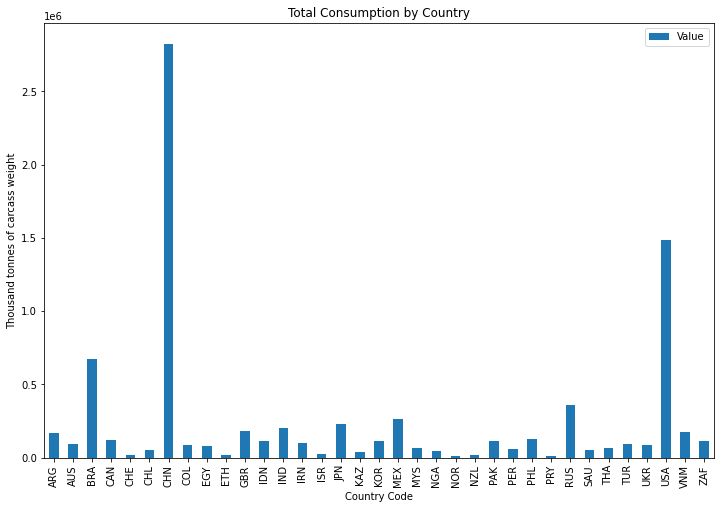

In [8]:
total_meat.plot(kind='bar', figsize=(12, 8))
plt.title('Total Consumption by Country')
plt.ylabel('Thousand tonnes of carcass weight')
plt.xlabel('Country Code');

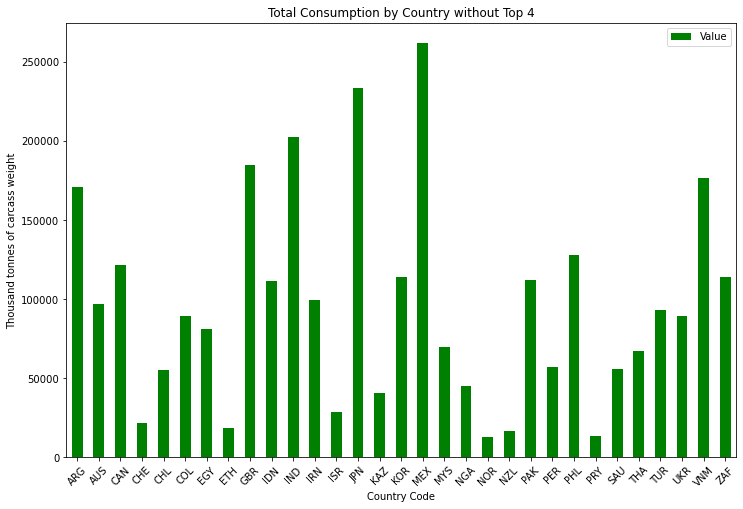

In [9]:
minus_top = total_meat.drop(labels = ['USA', 'CHN', 'BRA', 'RUS'], axis = 0)
minus_top.plot(kind='bar', color = 'green', figsize=(12, 8))
plt.title('Total Consumption by Country without Top 4')
plt.ylabel('Thousand tonnes of carcass weight')
plt.xlabel('Country Code')
plt.xticks(rotation = 45);

In [10]:
Diff_meat = meat_data.groupby('SUBJECT').sum()
Diff_meat = Diff_meat.drop(columns = 'TIME')
Diff_meat.head()

,Value
SUBJECT,
BEEF,6.309910e+06
PIG,1.072451e+07
POULTRY,9.601549e+06
SHEEP,1.163262e+06


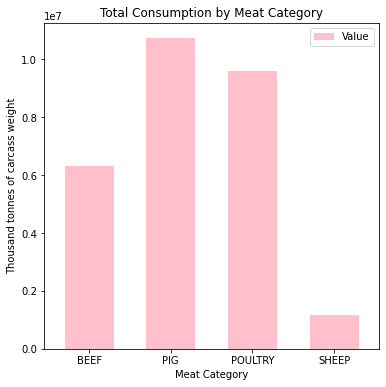

In [11]:
Diff_meat.plot(kind='bar', color = 'pink', figsize=(6,6), width=0.6)
plt.title('Total Consumption by Meat Category')
plt.ylabel('Thousand tonnes of carcass weight')
plt.xlabel('Meat Category')
plt.xticks(rotation=360);

In [12]:
meat_country = meat_data.drop(columns = ['MEASURE', 'TIME'])
meat_country = meat_country.groupby(['LOCATION', 'SUBJECT']).sum()
meat_country = meat_country.drop(labels = ['WLD', 'BRICS', 'OECD'])
meat_country.head()

Value
LOCATION SUBJECT           
ARG      BEEF     97138.201
         PIG      16475.467
         POULTRY  54723.214
         SHEEP     2336.869
AUS      BEEF     28127.631

In [13]:
column = meat_country["Value"]
max_index = column.idxmax()
max_index

('CHN', 'PIG')

In [14]:
df_1 = meat_country.reset_index()
df_1 = df_1.set_index('LOCATION')
df_1 = df_1.drop(labels = ['USA', 'CHN', 'BRA', 'RUS'])
df_1

,SUBJECT,Value
LOCATION,,
ARG,BEEF,97138.201
ARG,PIG,16475.467
ARG,POULTRY,54723.214
ARG,SHEEP,2336.869
AUS,BEEF,28127.631
...,...,...
VNM,SHEEP,458.064
ZAF,BEEF,34258.652
ZAF,PIG,8594.495


In [15]:
China = meat_country.loc[['CHN']]
print(China)

                        Value
LOCATION SUBJECT             
CHN      BEEF      237118.867
         PIG      1811929.463
         POULTRY   623251.152
         SHEEP     152419.439


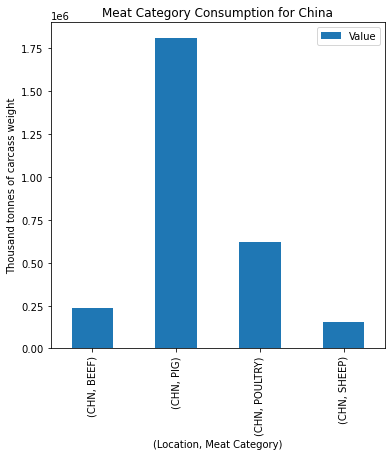

In [16]:
China.plot(kind='bar', figsize = (6,6))
plt.title('Meat Category Consumption for China')
plt.xlabel('(Location, Meat Category)')
plt.ylabel('Thousand tonnes of carcass weight');

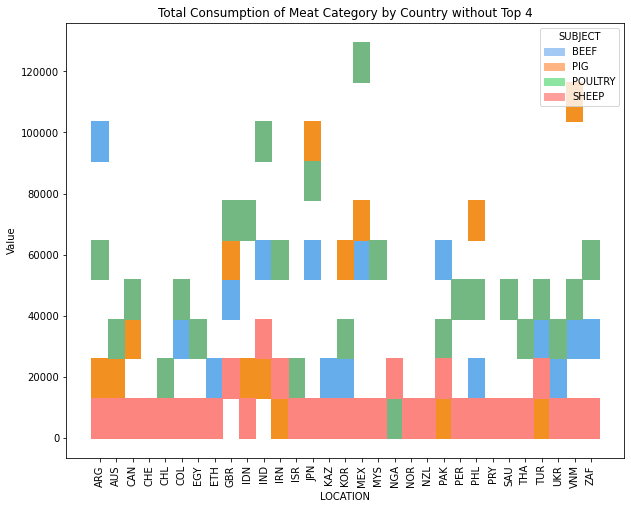

In [17]:
fig_dims = (10,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(ax=ax, data=df_1, x='LOCATION', y='Value' ,hue = 'SUBJECT', palette='pastel',multiple='stack')
plt.xticks(rotation=90)
plt.title('Total Consumption of Meat Category by Country without Top 4');

In [18]:
time_trend = meat_data.drop(columns = 'MEASURE')
time_trend

,LOCATION,SUBJECT,TIME,Value
5600,KOR,SHEEP,1990,9.563
5601,KOR,SHEEP,1991,7.896
5602,KOR,SHEEP,1992,15.467
5603,KOR,SHEEP,1993,11.516
5604,KOR,SHEEP,1994,14.189
...,...,...,...,...
11995,GBR,SHEEP,2025,303.964
11996,GBR,SHEEP,2026,303.925
11997,GBR,SHEEP,2027,304.111
11998,GBR,SHEEP,2028,304.370


In [19]:
time_trend_min = time_trend.loc[time_trend['TIME'] == 1990]
time_trend_min = time_trend_min.groupby(['LOCATION', 'TIME']).sum()
time_trend_max = time_trend.loc[time_trend['TIME'] == 2029]
time_trend_max = time_trend_max.groupby(['LOCATION', 'TIME']).sum()
frames= [time_trend_min, time_trend_max]
time_trends = pd.concat(frames)
time_trends = time_trends.reset_index()
time_trends = time_trends[time_trends['LOCATION'] != 'WLD']
time_trends = time_trends[time_trends['LOCATION'] != 'BRICS']
time_trends = time_trends[time_trends['LOCATION'] != 'OECD']

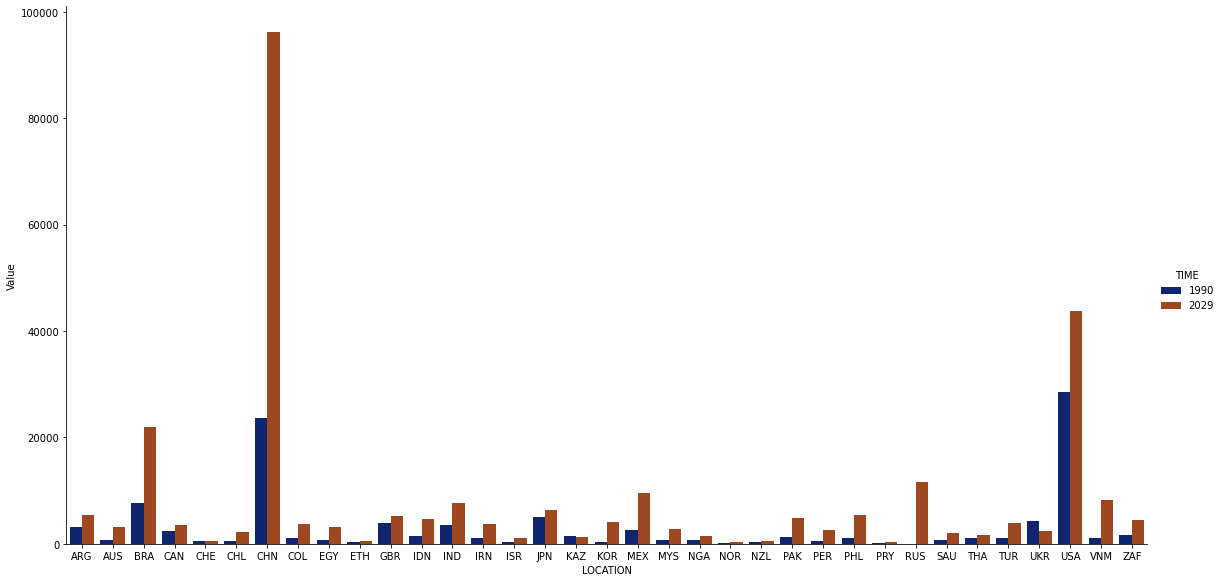

In [20]:
sns.catplot(
    data=time_trends,kind = 'bar',
    x="LOCATION", y="Value", hue="TIME", ci = 'sd', palette="dark", height=8, aspect=2
);

In [21]:
time_trends = time_trends[time_trends['LOCATION'] != 'CHN']
time_trends = time_trends[time_trends['LOCATION'] != 'USA']
time_trends = time_trends[time_trends['LOCATION'] != 'BRA']
time_trends = time_trends[time_trends['LOCATION'] != 'RUS']

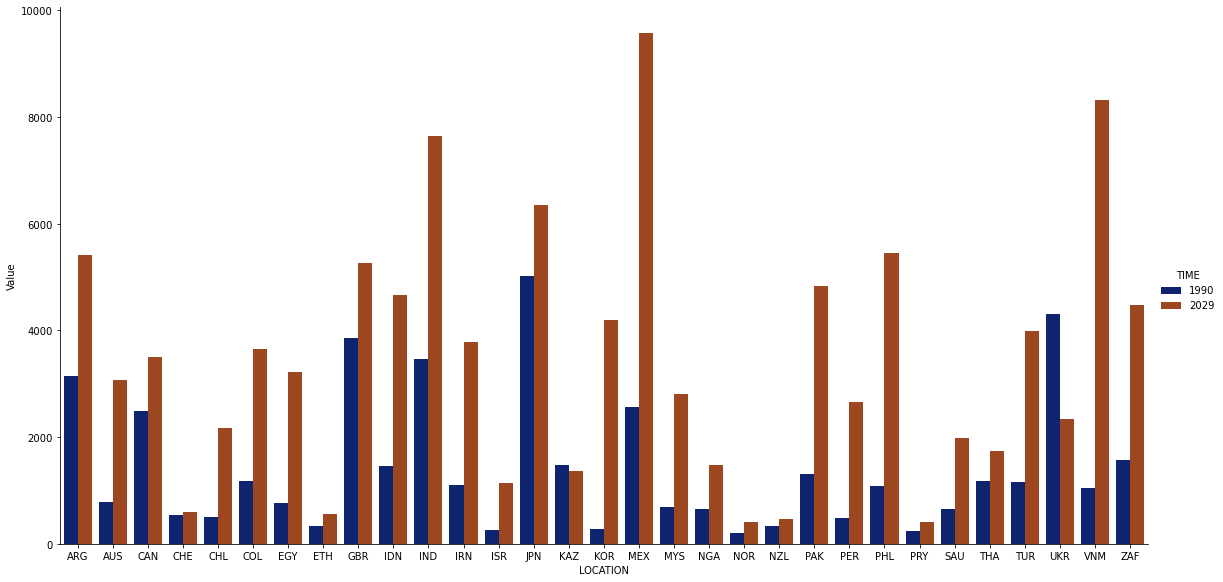

In [22]:
sns.catplot(
    data=time_trends,kind = 'bar',
    x="LOCATION", y="Value", hue="TIME", ci = 'sd', palette="dark", height=8, aspect=2
);